# 线性回归

线性回归的目标是拟合一个带有系数 $$w = (w_1, ..., w_p)$$ 的线性模型，使得数据集实际观测数据和预测数据（估计值）之间的残差平方和（L2范数）最小。其数学表达式为:

$$\underset{w}{min} {|| X w^T - y||_2}^2$$


下面是一个糖尿病数据集中某列数据的线性回归示例。

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]] [151.  75. 141. 206. 135.]
系数: 
 [938.23786125]
均方误差: 2548.07
确定系数: 0.47


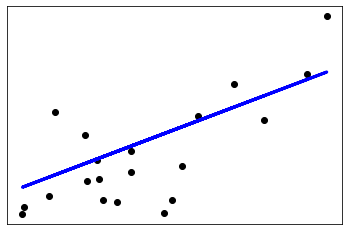

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# 加载糖尿病数据集
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# 只使用一个特征
# 从 diabetes_X 中选择所有行，并且将第三列的元素作为一个新的维度添加进去。 (n_samples, n_features) -> (n_samples, 1)。
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(diabetes_X[:5], diabetes_y[:5])

# X划分测试集和训练集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# y划分测试集和训练集
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# 创建线性回归对象
regr = linear_model.LinearRegression()

# 使用测试集训练模型
regr.fit(diabetes_X_train, diabetes_y_train)

# 使用测试集预测
diabetes_y_pred = regr.predict(diabetes_X_test)

# 系数
print("系数: \n", regr.coef_)
# 均方误差
print("均方误差: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# 确定系数，用R²表示
print("确定系数: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# 可视化输出
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

这个例子涉及到了很多概念。下面将逐步解答。

* [最小二乘法](https://tianxuzhang.github.io/introduction-to-machine-learning/docs/最小二乘法.html)
* [距离和范数](https://tianxuzhang.github.io/introduction-to-machine-learning/docs/距离和范数.html)